In [43]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
import warnings
warnings.filterwarnings('ignore') 
%matplotlib inline

In [44]:
data = pd.read_csv('marketing_campaign.csv', sep="\t")

In [45]:
data.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [46]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

**CHECKING FOR NULL VALUES**

In [47]:
data.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [48]:
data['Income'].fillna(data['Income'].median(), inplace = True)

**CHECKING FOR DUPLICATED VALUES**

In [49]:
data.duplicated().sum()

0

**DROPPING MEANINGLESS COLUMNS**

In [50]:
#Z_CostContact and Z_Revenue columns have no description as to what they represent. Let's investigate and see if they contain interesting info
data.Z_CostContact.nunique()

1

In [51]:
data.Z_Revenue.nunique()

1

In [52]:
print(data['Z_CostContact'].unique())
print(data['Z_Revenue'].unique())

[3]
[11]


Since the info on both colimns has no variation. dropping those columns will not affect the final outcome

In [53]:
data = data.drop(columns=['ID', 'Z_CostContact', 'Z_Revenue', 'Dt_Customer'], axis=1)

**FIXING COLUMNS**

In [54]:
#transform 'Year_Birth' column into age column by simple subtraction
data['Age'] = (2022 - data['Year_Birth']).astype(np.int64)
data.drop('Year_Birth', axis=1, inplace=True)


In [55]:
data['No_of_children'] = data['Kidhome'] + data['Teenhome']
data.drop(['Kidhome', 'Teenhome'], axis=1, inplace=True)

In [56]:
data.Education.unique()

array(['Graduation', 'PhD', 'Master', 'Basic', '2n Cycle'], dtype=object)

In [57]:
data["Education"].replace(['Graduation', 'PhD', 'Master','2n Cycle'],"Graduate", inplace=True)
data["Education"].replace("Basic","Under_Graduate", inplace=True)

In [58]:
data.Marital_Status.unique()

array(['Single', 'Together', 'Married', 'Divorced', 'Widow', 'Alone',
       'Absurd', 'YOLO'], dtype=object)

In [59]:
data["Marital_Status"].replace(["Together","Married"], "Relationship", inplace=True)
data["Marital_Status"].replace(["Divorced","Widow","Alone","Absurd","YOLO"], "Single", inplace=True)

In [60]:
data.head()

,Education,Marital_Status,Income,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age,No_of_children
0,Graduate,Single,58138.0,58,635,88,546,172,88,88,...,7,0,0,0,0,0,0,1,65,0
1,Graduate,Single,46344.0,38,11,1,6,2,1,6,...,5,0,0,0,0,0,0,0,68,2
2,Graduate,Relationship,71613.0,26,426,49,127,111,21,42,...,4,0,0,0,0,0,0,0,57,0
3,Graduate,Relationship,26646.0,26,11,4,20,10,3,5,...,6,0,0,0,0,0,0,0,38,1
4,Graduate,Relationship,58293.0,94,173,43,118,46,27,15,...,5,0,0,0,0,0,0,0,41,1


In [61]:
data.describe().T 

,count,mean,std,min,25%,50%,75%,max
Income,2240.0,52237.975446,25037.955891,1730.0,35538.75,51381.5,68289.75,666666.0
Recency,2240.0,49.109375,28.962453,0.0,24.00,49.0,74.00,99.0
MntWines,2240.0,303.935714,336.597393,0.0,23.75,173.5,504.25,1493.0
MntFruits,2240.0,26.302232,39.773434,0.0,1.00,8.0,33.00,199.0
MntMeatProducts,2240.0,166.950000,225.715373,0.0,16.00,67.0,232.00,1725.0
MntFishProducts,2240.0,37.525446,54.628979,0.0,3.00,12.0,50.00,259.0
MntSweetProducts,2240.0,27.062946,41.280498,0.0,1.00,8.0,33.00,263.0
MntGoldProds,2240.0,44.021875,52.167439,0.0,9.00,24.0,56.00,362.0
NumDealsPurchases,2240.0,2.325000,1.932238,0.0,1.00,2.0,3.00,15.0
NumWebPurchases,2240.0,4.084821,2.778714,0.0,2.00,4.0,6.00,27.0


it seems there are some outliers the age column. The maximum age should not be 129. The income column also looks to be affected by outlier.

**REMOVING OUTLIERS**

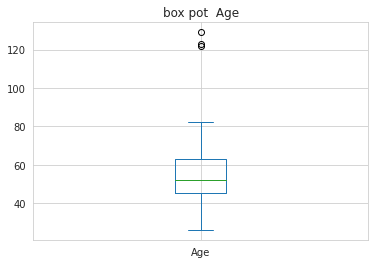

<Figure size 1152x1152 with 0 Axes>

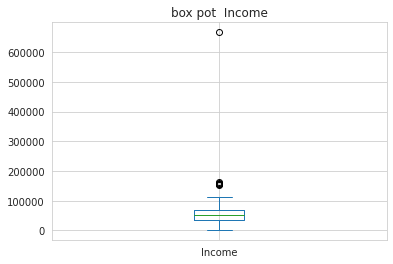

<Figure size 1152x1152 with 0 Axes>

In [62]:
features= ["Age", "Income"]

for col in features:
  data[col].plot(kind='box',  grid=True)  
  plt.title("box pot  "+ col)
  plt.figure(figsize=(16,16))
  plt.show()

In [63]:
data = data[(data["Age"]<100)]
data = data[(data["Income"]<600000)]

**EXPLORATORY DATA ANALYSIS AND VISUALIZATION**

In [64]:
import plotly.express as px
import plotly.io as pio
data_most_spend = pd.DataFrame((data.loc[:,('MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds')]).melt())
data_most_spend['variable'].replace({'MntWines': 'Wine', 'MntFruits': 'Friuts', 'MntMeatProducts': 'Meat', 'MntFishProducts': 'Fish', 'MntSweetProducts': 'Sweets', 'MntGoldProds': 'Gold'}, inplace=True)
pie_chart = px.pie(
        data_frame=data_most_spend,
        values='value',
        names='variable',
        color='variable',                   
        color_discrete_sequence=['red','green','blue','orange','black', 'Yellow'],                
        hover_data=['value'],           
        title='Customers Spending on Products',    
        template='presentation',           
        width=800,                         
        height=600,                         
        hole=0.5)

pie_chart.update_traces(textposition='outside', textinfo='percent+label', marker=dict(line=dict(color='White', width=2)), pull=[0, 0, 0.2, 0, 0, 0], opacity=0.7)
pio.show(pie_chart)

In [65]:
promotions = pd.DataFrame((data.loc[:,('AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5')]).melt())
promotions['variable'].replace({'AcceptedCmp1':'Accepted offer at first campaign', 
                                     'AcceptedCmp2': 'Accepted offer at second campaign',
                                     'AcceptedCmp3':'Accepted offer at third campaign',
                                     'AcceptedCmp4' : 'Accepted offer at fourth campaign', 
                                     'AcceptedCmp5': 'Accepted offer at fiveth campaign' }, inplace=True)
pie_chart = px.pie(
        data_frame=promotions,
        values='value',
        names='variable',
        color='variable',                   
        color_discrete_sequence=['red','green','blue','orange','black'],                
        hover_data=['value'],           
        title='Customers Offer Acceptance on Campaigns',    
        template='presentation',           
        width=800,                         
        height=600,                         
        hole=0.5)

pie_chart.update_traces(textposition='outside', textinfo='percent', marker=dict(line=dict(color='White', width=2)), pull=[0, 0, 0.2, 0, 0], opacity=0.7)
pio.show(pie_chart)

In [66]:
px.scatter(data_frame=data, x= 'Income', y= 'Age', color = 'Education')
plt.show()

In [67]:
data["Purchases_total"]= data["NumDealsPurchases"] + data["NumWebPurchases"] + data["NumCatalogPurchases"] + data["NumStorePurchases"]

In [68]:
px.scatter(data_frame=data, y= 'Income', x= 'Purchases_total', color= 'No_of_children')

In [69]:
data["Spend_total"] = data["MntWines"]+ data["MntFruits"]+ data["MntMeatProducts"]+ data["MntFishProducts"]+ data["MntSweetProducts"]+ data["MntGoldProds"]

In [70]:
px.scatter(data_frame=data, x= 'Income', y= 'Spend_total', color = 'Age')

In [71]:
data.columns

Index(['Education', 'Marital_Status', 'Income', 'Recency', 'MntWines',
       'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Response', 'Age', 'No_of_children',
       'Purchases_total', 'Spend_total'],
      dtype='object')

In [74]:
data.drop(columns = ['Purchases_total', 'Spend_total'], axis=1)

,Education,Marital_Status,Income,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age,No_of_children
0,Graduate,Single,58138.0,58,635,88,546,172,88,88,...,7,0,0,0,0,0,0,1,65,0
1,Graduate,Single,46344.0,38,11,1,6,2,1,6,...,5,0,0,0,0,0,0,0,68,2
2,Graduate,Relationship,71613.0,26,426,49,127,111,21,42,...,4,0,0,0,0,0,0,0,57,0
3,Graduate,Relationship,26646.0,26,11,4,20,10,3,5,...,6,0,0,0,0,0,0,0,38,1
4,Graduate,Relationship,58293.0,94,173,43,118,46,27,15,...,5,0,0,0,0,0,0,0,41,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,Graduate,Relationship,61223.0,46,709,43,182,42,118,247,...,5,0,0,0,0,0,0,0,55,1
2236,Graduate,Relationship,64014.0,56,406,0,30,0,0,8,...,7,0,0,0,1,0,0,0,76,3
2237,Graduate,Single,56981.0,91,908,48,217,32,12,24,...,6,0,1,0,0,0,0,0,41,0
2238,Graduate,Relationship,69245.0,8,428,30,214,80,30,61,...,3,0,0,0,0,0,0,0,66,1


**ENCODING CATEGORICAL VARIABLES**

In [75]:
from sklearn.preprocessing import LabelEncoder
encode = LabelEncoder()
data['Education'] = encode.fit_transform(data['Education'])
data['Marital_Status'] = encode.fit_transform(data['Marital_Status'])

**SCALING**

In [82]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
data_new= sc.fit_transform(data)

**K MEANS CLUSTERING**

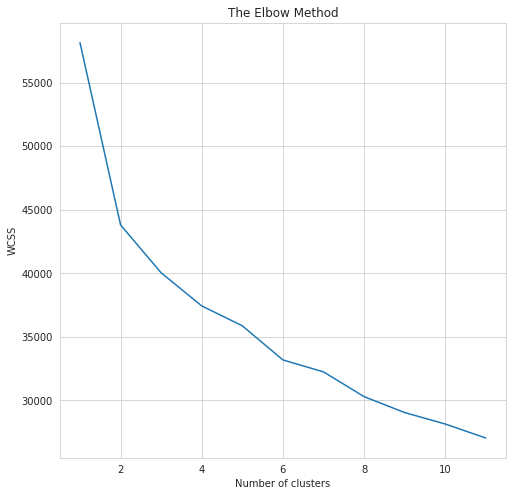

In [83]:
from sklearn.cluster import KMeans 
wcss = []
for i in range(1,12):
  kmeans = KMeans(n_clusters = i, init = 'k-means++')
  kmeans.fit(data_new)
  wcss.append(kmeans.inertia_)
plt.figure(figsize=(8,8))
plt.plot(range(1, 12), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [84]:
kmeans = KMeans(n_clusters = 4, init = 'k-means++')
kmeans.fit(data)

KMeans(n_clusters=4)

In [85]:
y=kmeans.labels_
print(y)

[0 3 0 ... 0 0 3]


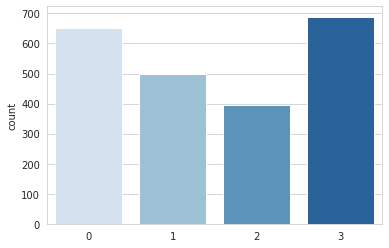

In [86]:
sns.countplot(x=kmeans.labels_, palette='Blues')
plt.show()

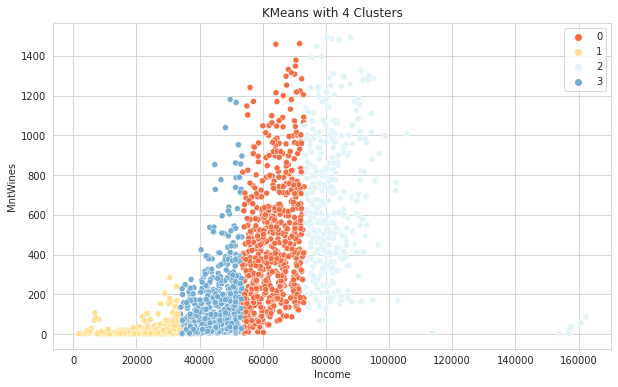

In [92]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data['Income'], data['MntWines'], hue=y, 
                palette=sns.color_palette('RdYlBu', 4))
plt.title('KMeans with 4 Clusters')
plt.show()

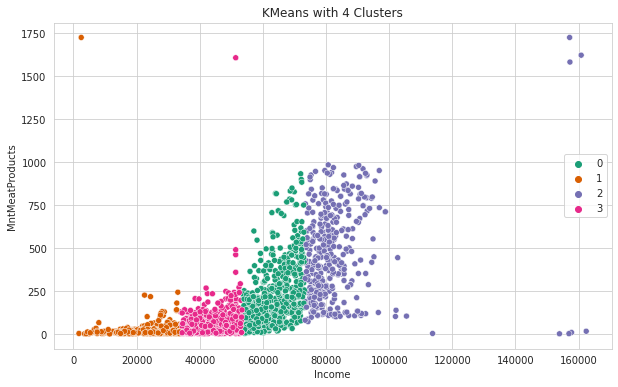

In [94]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data['Income'], data['MntMeatProducts'], hue=y, 
                palette=sns.color_palette('Dark2', 4))
plt.title('KMeans with 4 Clusters')
plt.show()

In [95]:
data["Purchases_total"]= data["NumDealsPurchases"] + data["NumWebPurchases"] + data["NumCatalogPurchases"] + data["NumStorePurchases"]

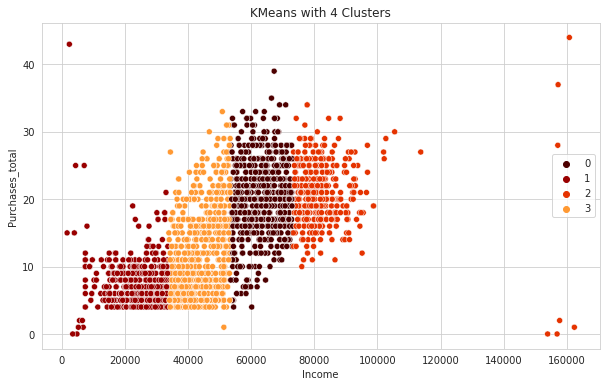

In [101]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data['Income'], data['Purchases_total'], hue=y, 
                palette=sns.color_palette('gist_heat', 4))
plt.title('KMeans with 4 Clusters')
plt.show()

Conclusion: from clusterin result, it is clear that the company can target its customers based on their income and provide various offers accordingly. 